# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


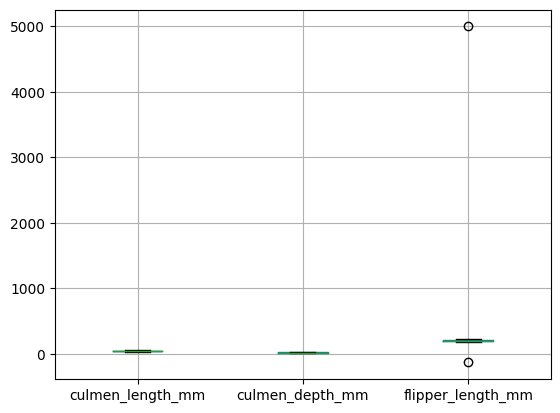

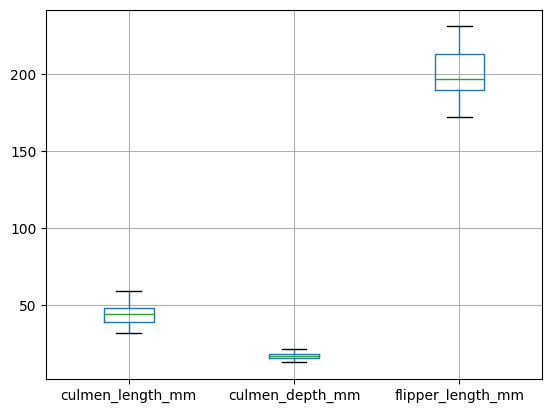

     culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0           -0.905520         0.793126  ...   -0.991031  0.997001
1           -0.831938         0.128503  ...    1.009050 -1.003008
2           -0.684775         0.435252  ...    1.009050 -1.003008
3           -1.347011         1.099875  ...    1.009050 -1.003008
4           -0.868729         1.764498  ...   -0.991031  0.997001
..                ...              ...  ...         ...       ...
328          0.584511        -1.763116  ...    1.009050 -1.003008
329          0.510929        -1.456367  ...    1.009050 -1.003008
330          1.173166        -0.740619  ...   -0.991031  0.997001
331          0.216602        -1.200743  ...    1.009050 -1.003008
332          1.081188        -0.536120  ...   -0.991031  0.997001

[333 rows x 6 columns]


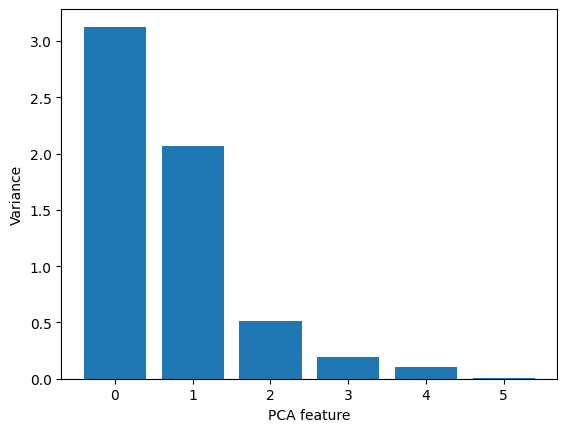

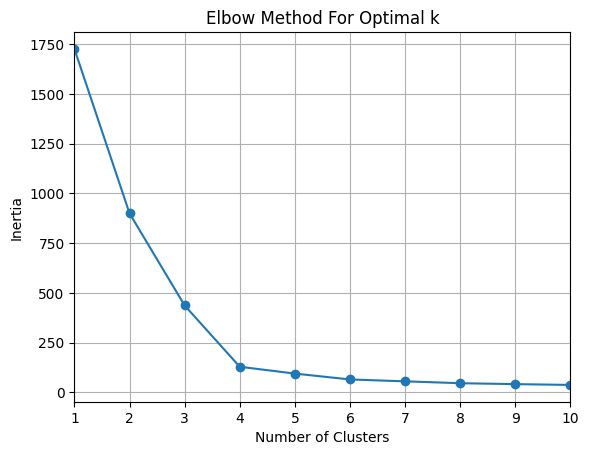

[0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1
 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0
 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0
 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 2 3 2 3 3 2 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 3 2 2 3 2 3 3 2 3 3 2 2 3 2 3 2 3 2 3 2 3 2 3 3 2 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 3 2 3 2 3 3 2 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 2 3 2 3 2 3 2 2 3 2 3]


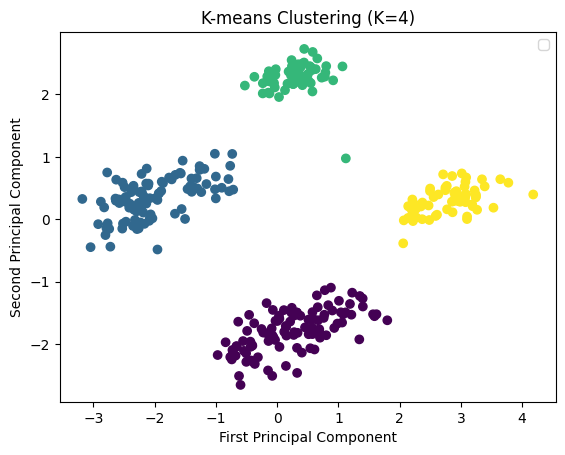

   culmen_length_mm  culmen_depth_mm  ...     sex  label
0              39.1             18.7  ...    MALE      0
1              39.5             17.4  ...  FEMALE      1
2              40.3             18.0  ...  FEMALE      1
4              36.7             19.3  ...  FEMALE      1
5              39.3             20.6  ...    MALE      0

[5 rows x 6 columns]
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             43.878302        19.111321         194.764151  4006.603774
1             40.217757        17.611215         189.046729  3419.158879
2             45.545763        14.262712         212.779661  4683.050847
3             49.473770        15.718033         221.540984  5484.836066
(333, 6)


In [35]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
#Show dataframe structure
print(penguins_df.head())
#Checking how many NaN values has each column
print(penguins_df.isna().sum())
#Removing rows with NaN values
penguins_clean = penguins_df.dropna()
print(penguins_clean.isna().sum())
#Creating a boxplot to define outliers
penguins_clean[["culmen_length_mm","culmen_depth_mm","flipper_length_mm"]].boxplot()
plt.show()
### Checking for rows in dataframe where value is more 4000 and lower than 0 
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
### Droping 9th and 14th row as they are outliers
penguins_clean = penguins_clean.drop([9,14])
penguins_clean[["culmen_length_mm","culmen_depth_mm","flipper_length_mm"]].boxplot()
plt.show()


### Preprocessing data
# Step 3 - Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)

# Step 4 - Perform preprocessing steps on the dataset - scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)
print(penguins_preprocessed)
### Performing Principal Component Analysis
pca = PCA()
pca.fit(penguins_preprocessed)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel("PCA feature")
plt.ylabel("Variance")
plt.xticks(features)
plt.show()
### As seen from the graph 2 is the optimal number of components to use
n_components = 2
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)  # Fixed line


### Performing K-mean clustering
### Detecting optimal number of clusters for k-means clustering

n_cluster = [1,2,3,4,5,6,7,8,9,10]
inertia = []

for i in n_cluster:
    knn = KMeans(n_clusters=i, random_state=42)
    knn.fit(penguins_PCA)  # Fixed line
    inertia.append(knn.inertia_)

# Move the plotting command outside of the loop to fix the error
plt.plot(n_cluster, inertia, marker = "o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xlim(1,10)
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

### X value decrease become very slight when n_cluster = 3

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(penguins_PCA)
labels = kmeans.predict(penguins_PCA)
print(labels)

### Setting first and second columns from penguins_PCA as 1st and 2nd component respectively 
xs = penguins_PCA[:,0]
ys = penguins_PCA[:,1]

### Visualizing KMeans result
plt.scatter(xs,ys, c = labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

### Creating new label column representing observation cluster
penguins_clean["label"] = labels
print(penguins_clean.head())

### Creating statistical table

# Corrected to select numeric columns properly for groupby operation
numeric_columns = ["culmen_length_mm","culmen_depth_mm", "flipper_length_mm","body_mass_g"]
stat_penguins = penguins_clean.groupby("label")[numeric_columns].mean()
print(stat_penguins)

print(penguins_clean.shape)